In [1]:
import pandas as pd
import json

In [3]:
df = pd.read_csv('activitycollector_notifications_2024-12-12_19-38-00.csv')

In [4]:
df

,document path,document ID,activity,app name,id,interaction active notifications,interaction time,location,notification content,notification title,posted active notifications,posted time,reason number,created time,updated time
0,projects/activitycollector/databases/(default)...,00tbPk3aN8Bbcr7tmewD,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|iGSZkeUn50ShdBWP2zVowKIxkguMy...,4.0,"{""normalized"":0.7052083333333333,""epoch_time"":...","{""readable"":""HOME"",""long"":-73.1102254,""lat"":40...",Yo,Advait,7,"{""normalized"":0.7046296296296296,""epoch_time"":...",12.0,12/04/2024 16:54,12/04/2024 16:55
1,projects/activitycollector/databases/(default)...,01lDi8VnbbP2bG1YQ8SZ,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|6oopRIu2ypLM5FXgaKYJpWgytRXx9...,6.0,"{""normalized"":0.8944212962962963,""epoch_time"":...","{""readable"":""HOME"",""long"":-73.1101455,""lat"":40...",Anyone selling onions? Hit me up.,Chapin Bazaar (3 messages): ~ Praveen Anand,8,"{""normalized"":0.8835532407407407,""epoch_time"":...",12.0,12/11/2024 21:12,12/11/2024 21:27
2,projects/activitycollector/databases/(default)...,02HF8Fq0AHUibJq7vIWU,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|j0kxU7R7uqDMMQBiRwTuKMu9n9qGf...,39.0,"{""normalized"":0.418125,""epoch_time"":1733324526...","{""readable"":""HOME"",""long"":-73.1102238,""lat"":40...",Ok ok,Karan Sbu,46,"{""normalized"":0.41758101851851853,""epoch_time""...",12.0,12/04/2024 10:01,12/04/2024 10:02
3,projects/activitycollector/databases/(default)...,02HJLiCjy8masEBjueAl,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|ioeHuX3mTFHAs+PLgZkdOIg8gL2zy...,15.0,"{""normalized"":0.8924768518518519,""epoch_time"":...","{""readable"":""HOME"",""long"":-73.1100921,""lat"":40...","Reacted 😂 to ""Sujeeth ra""",Fake G1103: Ojas Deshpande SBU,16,"{""normalized"":0.8922569444444445,""epoch_time"":...",8.0,12/05/2024 21:24,12/05/2024 21:25
4,projects/activitycollector/databases/(default)...,041D6XDR7iGvVjr39MDE,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|lZsQSeP5s3oK+UyvglK/VUBDWknzH...,23.0,"{""normalized"":0.4787037037037037,""epoch_time"":...","{""readable"":""HOME"",""long"":-73.1101637,""lat"":40...",📷 One of my friend wanted to sell Apple AirPod...,Chapin Bazar 2 (3 messages): ~ Indrajeet kumar,26,"{""normalized"":0.47850694444444447,""epoch_time""...",12.0,12/11/2024 11:29,12/11/2024 11:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,projects/activitycollector/databases/(default)...,zxNEIDEZjotbkwJUayGz,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|8NdTzvpte425WtFlMVsjRRl2n15Ns...,13.0,"{""normalized"":0.042152777777777775,""epoch_time...","{""readable"":""LIBRARY"",""long"":-73.1164114,""lat""...",Ya,Kaksha,20,"{""normalized"":0.04068287037037037,""epoch_time""...",12.0,11/30/2024 00:58,11/30/2024 01:00
4034,projects/activitycollector/databases/(default)...,zxQapllKtwFGog7bflgY,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|bu9+jt2wbtN42BAnXlDrRQczPz7D7...,16.0,"{""normalized"":0.5277546296296296,""epoch_time"":...","{""readable"":""HOME"",""long"":-73.1101567,""lat"":40...",🔗 Even Ana De Armas Couldn't Resist 🌚 #cinemat...,Ojas Deshpande SBU,20,"{""normalized"":0.5273958333333333,""epoch_time"":...",12.0,12/02/2024 12:39,12/02/2024 12:39
4035,projects/activitycollector/databases/(default)...,zyFwO0n1AzPt9Gsh3JgX,NaN,com.whatsapp,0|com.whatsapp|1|8NdTzvpte425WtFlMVsjRRl2n15Ns...,NaN,NaN,NaN,If youur ticket is 600$,Kaksha,12,"{""normalized"":0.8719097222222222,""epoch_time"":...",NaN,12/04/2024 20:55,12/04/2024 20:55
4036,projects/activitycollector/databases/(default)...,zyWaHa7Pego2m6ICCpI4,"{""activity"":""NOT_DETECTED""}",com.whatsapp,0|com.whatsapp|1|j0kxU7R7uqDMMQBiRwTuKMu9n9qGf...,18.0,"{""normalized"":0.8095717592592593,""epoch_time"":...","{""readable"":""HOME"",""long"":-73.110169,""lat"":40....",I’ll come,Karan Sbu,22,"{""normalized"":0.8042939814814815,""epoch_t

In [5]:
new_df = df[['app_name_cleaned', 'interaction active notifications', 'interaction_time_normalized', 'location_name', 'activity', 'reason number']]
# new_df[new_df['app_name_cleaned'] == 'email'].dropna()[new_df['reason number'] == ]
new_df.dropna()['reason number'].unique()

KeyError: "['app_name_cleaned', 'interaction_time_normalized', 'location_name'] not in index"

In [6]:
def extract_from_json(row_data, key):
    # print(row_data,  type(row_data) is not str)

    if type(row_data) is not str:
        return -1.0

    loaded = json.loads(row_data)
    if key in loaded:
        return loaded[key]
    else:
        return ""

def app_name_map(row_data):
    if row_data == 'com.whatsapp':
        return 'whatsapp'
    if row_data == 'com.google.android.gm':
        return 'email'
    if row_data == 'com.instagram.android':
        return 'instagram'

def app_name_numeric(row_data):
    if row_data == 'com.whatsapp':
        return 0
    if row_data == 'com.google.android.gm':
        return 1
    if row_data == 'com.instagram.android':
        return 2

def reason_map(row):
    clicks = [1.0, 8.0, 24.0]
    if row in clicks:
        return 'clicked'
    else:
        return 'dismissed'

df["interaction_time_normalized"] = df["interaction time"].apply(lambda x: extract_from_json(x, "normalized"))
df["arrival_time_normalized"] = df["posted time"].apply(lambda x: extract_from_json(x, "normalized"))
df["location_name"] = df["location"].apply(lambda x: extract_from_json(x, "readable")) 
df["app_name_cleaned"] = df["app name"].apply(lambda x: app_name_map(x))
df["app_name_numeric"] = df["app name"].apply(lambda x: app_name_numeric(x))
df["reason_mapped"] = df["reason number"].apply(reason_map)

In [7]:
df_filtered = df[["interaction_time_normalized", "arrival_time_normalized", "location_name", "app_name_cleaned", "app_name_numeric", "reason_mapped"]]

In [8]:
df_filtered[df['reason_mapped'] != 'dismissed']

,interaction_time_normalized,arrival_time_normalized,location_name,app_name_cleaned,app_name_numeric,reason_mapped
3,0.892477,0.892257,HOME,whatsapp,0,clicked
17,0.837396,0.827593,HOME,whatsapp,0,clicked
37,0.907801,0.905243,HOME,whatsapp,0,clicked
52,0.931435,0.920949,HOME,email,1,clicked
62,0.997558,0.979502,UNKNOWN,email,1,clicked
...,...,...,...,...,...,...
3955,0.818241,0.818148,HOME,whatsapp,0,clicked
3980,0.879109,0.878553,HOME,whatsapp,0,clicked
3988,0.631157,0.626551,HOME,email,1,clicked
4007,0.414734,0.328553,HOME,whatsapp,0,clicked


In [10]:
df_filtered = df_filtered[(df_filtered["interaction_time_normalized"] != -1.0) & (df_filtered["arrival_time_normalized"] != -1.0) & (df_filtered["location_name"] != -1.0)]

In [11]:
df_filtered[df_filtered["app_name_numeric"] != 2].to_csv("cleaned_dataset.csv", index=False)

In [130]:
df_filtered = df_filtered[(df_filtered['reason number'] == 8.0) | (df_filtered['reason number'] == 1.0) | (df_filtered['reason number'] == 24.0)]

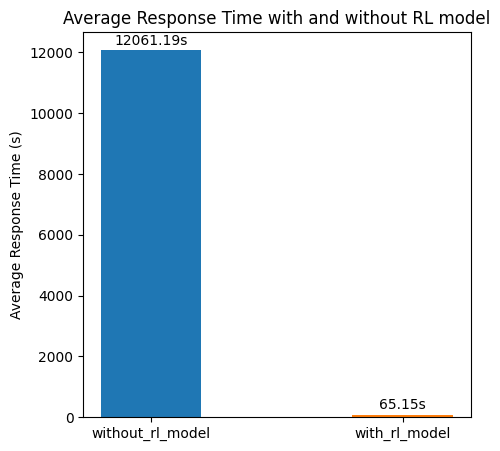

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Data
categories = ['without_rl_model', 'with_rl_model']
values = [12061.19, 65.15]

# Create bar plot
plt.figure(figsize=(5, 5))
bar_width = 0.4
x = np.arange(len(categories))

# Assign different colors to each bar
colors = ['blue', 'green']

plt.bar(x, values, width=bar_width, color=mcolors.TABLEAU_COLORS)

# Add labels and title
# plt.xlabel('Categories')
plt.ylabel('Average Response Time (s)')
plt.title('Average Response Time with and without RL model')
plt.xticks(x, categories)

# Add value labels on top of each bar
for i in range(len(values)):
    plt.text(x[i], values[i] + 100, f'{values[i]:.2f}s', ha='center', va='bottom')

# Show the plot
plt.show()

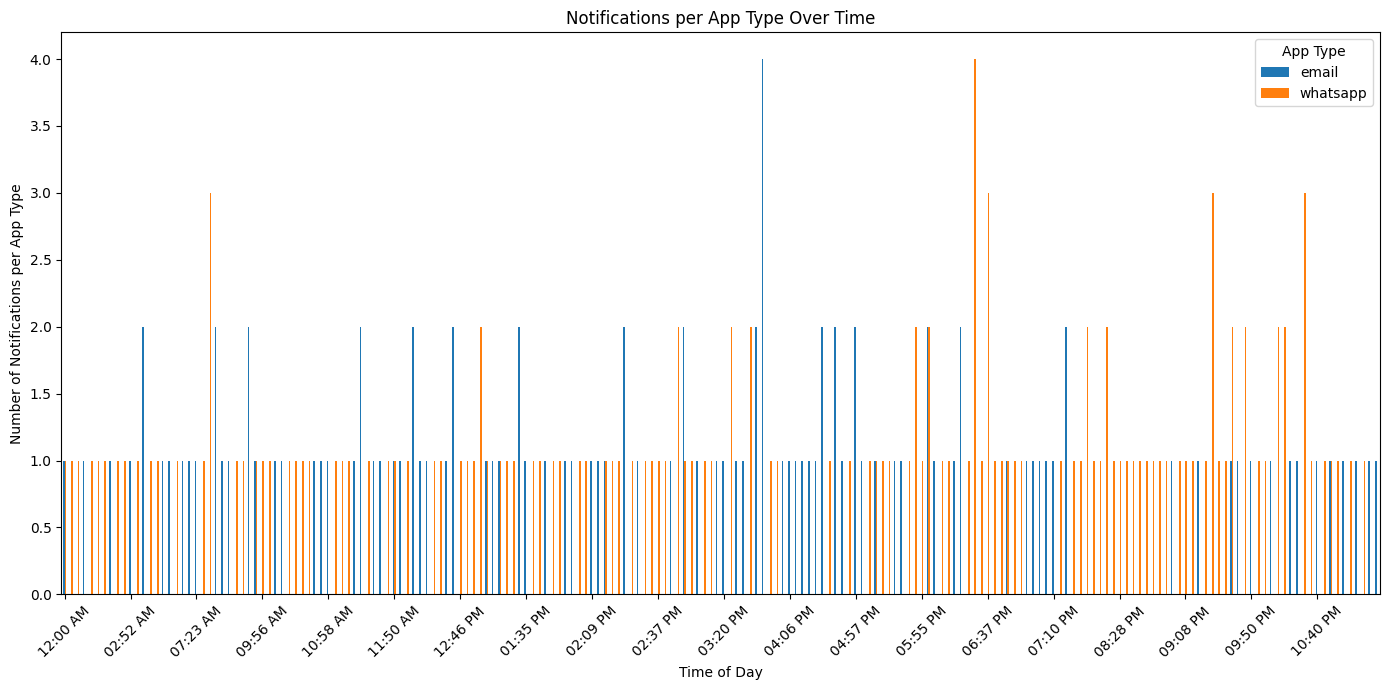

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Convert normalized time to human-readable time format
df['time_human_readable'] = pd.to_datetime(df['arrival_time_normalized'] * 24 * 60, unit='m', origin='unix').dt.strftime('%I:%M %p')
df = df[df['reason_mapped'] == 'clicked']
# Count notifications per app type
notification_counts = df.groupby(['time_human_readable', 'app_name_cleaned']).size().reset_index(name='notifications')

# Pivot the data for bar plotting
pivot_df = notification_counts.pivot(index='time_human_readable', columns='app_name_cleaned', values='notifications').fillna(0)

# Sort the index to ensure that it is in order from 12:00 am to end of day
pivot_df.index = pd.to_datetime(pivot_df.index, format='%I:%M %p')
pivot_df = pivot_df.sort_index()

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
pivot_df.plot(kind='bar', stacked=False, ax=ax)

# Set x-ticks to show every hour (or adjust as needed)
tick_positions = np.arange(0, len(pivot_df), step=10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(pivot_df.index[tick_positions].strftime('%I:%M %p'), rotation=45)

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Number of Notifications per App Type')
plt.title('Notifications per App Type Over Time')
plt.legend(title='App Type')
plt.tight_layout()

# Show the plot
plt.show()


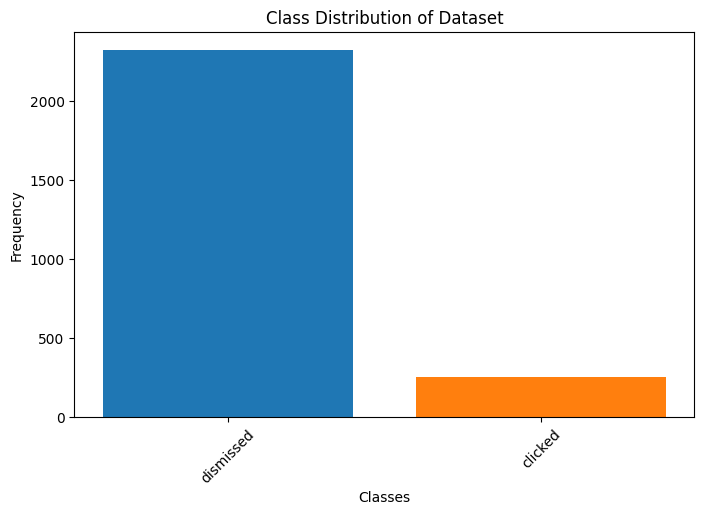

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset = pd.read_csv('cleaned_dataset.csv')

# Analyze class distribution
class_distribution = dataset['reason_mapped'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(class_distribution.index, class_distribution.values, color=mcolors.TABLEAU_COLORS)
plt.title('Class Distribution of Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# plt.grid(axis='y')
plt.show()
